In [4]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("text.csv")

In [8]:
data.value_counts()

Unnamed: 0  text                                                                                                                                                                            label
0           i just feel really helpless and heavy hearted                                                                                                                                   4        1
277869      i didnt quite realize how alike we looked until we got outside and by that time both of us were feeling too stubborn to go back in and switch out our shirts                    3        1
277879      i do feel i have learnt valuable lessons over the last two years principally you are not entitled to anything you have to earn it and if it s not there then you can t have it  1        1
277878      i am beginning to feel a real sincere sadness                                                                                                                                   1        1
277877    

In [9]:
data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [10]:
label_to_category = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

data['sentiment'] = data['label'].map(label_to_category)

In [11]:
data.value_counts()

Unnamed: 0  text                                                                                                                                                                            label  sentiment
0           i just feel really helpless and heavy hearted                                                                                                                                   4      fear         1
277869      i didnt quite realize how alike we looked until we got outside and by that time both of us were feeling too stubborn to go back in and switch out our shirts                    3      anger        1
277879      i do feel i have learnt valuable lessons over the last two years principally you are not entitled to anything you have to earn it and if it s not there then you can t have it  1      joy          1
277878      i am beginning to feel a real sincere sadness                                                                                                            

In [12]:
data['sentiment'].value_counts()

sentiment
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

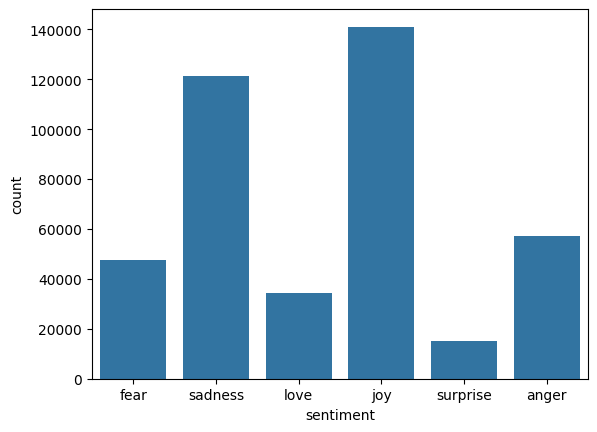

In [13]:
sns.countplot(x='sentiment',data=data)

In [14]:
import neattext.functions as nfx

In [15]:
data['Clean_Content'] = data['text'].apply(nfx.remove_userhandles)
data['Clean_Content'] = data['Clean_Content'].apply(nfx.remove_stopwords)

In [16]:
data

,Unnamed: 0,text,label,sentiment,Clean_Content
0,0,i just feel really helpless and heavy hearted,4,fear,feel helpless heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,sadness,ive enjoyed able slouch relax unwind frankly n...
2,2,i gave up my internship with the dmrg and am f...,4,fear,gave internship dmrg feeling distraught
3,3,i dont know i feel so lost,0,sadness,dont know feel lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,fear,kindergarten teacher thoroughly weary job take...
...,...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,love,feel like telling horny devils find site suite...
416805,416805,i began to realize that when i was feeling agi...,3,anger,began realize feeling agitated restless though...
416806,416806,i feel very curious be why previous early dawn...,5,surprise,feel curious previous early dawn time seek tro...
416807,416807,i feel that becuase of the tyranical nature of...,3,anger,feel becuase tyranical nature government el sa...


In [17]:
x = data['Clean_Content']
y = data['sentiment']

In [18]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
pipe_lr.fit(x_train,y_train)

y_pred = pipe_lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy_LR:", accuracy)
print("Precision_LR:", precision)
print("Recall_LR:", recall)
print("F1 Score_LR:", f1)

Accuracy_LR: 0.886455059459546
Precision_LR: 0.8409097002275513
Recall_LR: 0.8401590260675825
F1 Score_LR: 0.8405294074532655


In [24]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)

y_pred = pipe_svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy_SVM:", accuracy)
print("Precision_SVM:", precision)
print("Recall_SVM:", recall)
print("F1 Score_SVM:", f1)

Accuracy_SVM: 0.8628391833209376
Precision_SVM: 0.8097969718867014
Recall_SVM: 0.8012258742817857
F1 Score_SVM: 0.8054015446328918


In [23]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)

y_pred = pipe_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy_RF:", accuracy)
print("Precision_RF:", precision)
print("Recall_RF:", recall)
print("F1 Score_RF:", f1)

Accuracy_RF: 0.8527626496485209
Precision_RF: 0.8009455555654493
Recall_RF: 0.79735422464268
F1 Score_RF: 0.7991185810797884


In [25]:
import joblib
pipeline_file = open("text_emotion_6param.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()